In [ ]:
!pip install ucimlrepo

In [1]:

from ucimlrepo import fetch_ucirepo
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

import random

In [2]:
# fetch dataset
cdc_diabetes_health_indicators = fetch_ucirepo(id=891)

# data (as pandas dataframes)
X = cdc_diabetes_health_indicators.data.features
y = cdc_diabetes_health_indicators.data.targets

# metadata
print(cdc_diabetes_health_indicators.metadata)

# variable information
print(cdc_diabetes_health_indicators.variables)

{'uci_id': 891, 'name': 'CDC Diabetes Health Indicators', 'repository_url': 'https://archive.ics.uci.edu/dataset/891/cdc+diabetes+health+indicators', 'data_url': 'https://archive.ics.uci.edu/static/public/891/data.csv', 'abstract': 'The Diabetes Health Indicators Dataset contains healthcare statistics and lifestyle survey information about people in general along with their diagnosis of diabetes. The 35 features consist of some demographics, lab test results, and answers to survey questions for each patient. The target variable for classification is whether a patient has diabetes, is pre-diabetic, or healthy. ', 'area': 'Health and Medicine', 'tasks': ['Classification'], 'characteristics': ['Tabular', 'Multivariate'], 'num_instances': 253680, 'num_features': 21, 'feature_types': ['Categorical', 'Integer'], 'demographics': ['Sex', 'Age', 'Education Level', 'Income'], 'target_col': ['Diabetes_binary'], 'index_col': ['ID'], 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_

In [4]:
pd.set_option('display.max_colwidth', None)
cdc_diabetes_health_indicators.variables

,name,role,type,demographic,description,units,missing_values
0,ID,ID,Integer,None,Patient ID,None,no
1,Diabetes_binary,Target,Binary,None,0 = no diabetes 1 = prediabetes or diabetes,None,no
2,HighBP,Feature,Binary,None,0 = no high BP 1 = high BP,None,no
3,HighChol,Feature,Binary,None,0 = no high cholesterol 1 = high cholesterol,None,no
4,CholCheck,Feature,Binary,None,0 = no cholesterol check in 5 years 1 = yes cholesterol check in 5 years,None,no
5,BMI,Feature,Integer,None,Body Mass Index,None,no
6,Smoker,Feature,Binary,None,Have you smoked at least 100 cigarettes in your entire life? [Note: 5 packs = 100 cigarettes] 0 = no 1 = yes,None,no
7,Stroke,Feature,Binary,None,(Ever told) you had a stroke. 0 = no 1 = yes,None,no
8,HeartDiseaseorAttack,Feature,Binary,None,coronary heart disease (CHD) or myocardial infarction (MI) 0 = no 1 = yes,None,no
9,PhysActivity,Feature,Binary,None,physical activity in past 30 days - not including job 0 = no 1 = yes,None,no


In [5]:
print("Number of positive cases:", len(y[y['Diabetes_binary'] == 1]))
print("Number of negative cases:", len(y[y['Diabetes_binary'] == 0]))

Number of positive cases: 35346
Number of negative cases: 218334


In [6]:
# split into 80/10/10
rand = False
state = 996

if rand:
  state = random.randint(0, 1000)
print('State:', state)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=state)

_, X_val, _, y_val = train_test_split(
    X, y, test_size=0.5, random_state=state)

print('Train len:', len(y_train), sum(y_train['Diabetes_binary']))
print('Test len:', len(y_test), sum(y_test['Diabetes_binary']))
print('Val len:', len(y_test), sum(y_val['Diabetes_binary']))

State: 996
Train len: 202944 28311
Test len: 50736 7035
Val len: 50736 17683


In [7]:
# find if duplicates (there are duplicates, should work on later)
mask = np.where(X.duplicated())
print(y['Diabetes_binary'])
sum(y['Diabetes_binary'])

0         0
1         0
2         0
3         0
4         0
         ..
253675    0
253676    1
253677    0
253678    0
253679    1
Name: Diabetes_binary, Length: 253680, dtype: int64


35346

In [10]:
grid_values = {'penalty': [None,'l1','l2','elasticnet'], 'solver': ['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag' , 'saga'], 'max_iter': [50,100,200]}
model_lr = GridSearchCV(LogisticRegression(), param_grid=grid_values)
model_lr.fit(X_train,y_train)

/home/will/USCCS/CS467-finalproject/projenv/lib/python3.11/site-packages/sklearn/utils/validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/will/USCCS/CS467-finalproject/projenv/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/will/USCCS/CS467-finalproject/projenv/lib/python3.11/site-packages/sklearn/utils/validation.py:1300: DataConversionWarning: A column-vector y was passed w

GridSearchCV(estimator=LogisticRegression(),
             param_grid={'max_iter': [50, 100, 200],
                         'penalty': [None, 'l1', 'l2', 'elasticnet'],
                         'solver': ['lbfgs', 'liblinear', 'newton-cg',
                                    'newton-cholesky', 'sag', 'saga']})

              precision    recall  f1-score   support

           0       0.88      0.98      0.92    109157
           1       0.53      0.15      0.23     17683

    accuracy                           0.86    126840
   macro avg       0.70      0.56      0.58    126840
weighted avg       0.83      0.86      0.83    126840

{'max_iter': 200, 'penalty': None, 'solver': 'lbfgs'}
              precision    recall  f1-score   support

           0       0.88      0.98      0.93     43701
           1       0.53      0.15      0.23      7035

    accuracy                           0.86     50736
   macro avg       0.71      0.56      0.58     50736
weighted avg       0.83      0.86      0.83     50736



Text(0.5, 23.52222222222222, 'Predicted label')

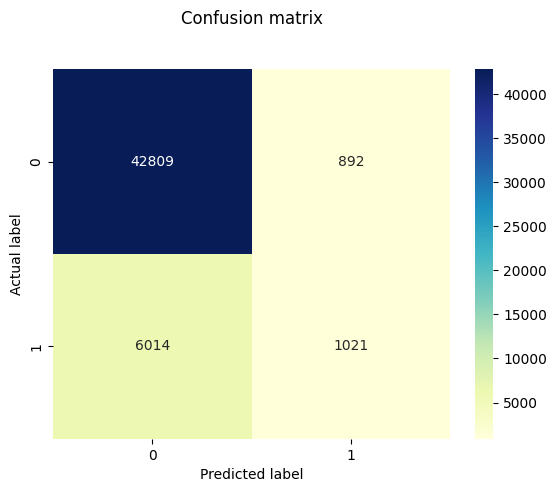

In [196]:
y_pred = model_lr.predict(X_test)
y_val_pred = model_lr.predict(X_val)
print(classification_report(y_val, y_val_pred))
print(model_lr.best_params_)
print(classification_report(y_test, y_pred))
sns.heatmap(pd.DataFrame(confusion_matrix(y_test, y_pred)), annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')


/home/will/USCCS/CS467-finalproject/projenv/lib/python3.11/site-packages/sklearn/utils/validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


              precision    recall  f1-score   support

           0       0.88      0.98      0.93     43701
           1       0.53      0.14      0.23      7035

    accuracy                           0.86     50736
   macro avg       0.70      0.56      0.58     50736
weighted avg       0.83      0.86      0.83     50736



/home/will/USCCS/CS467-finalproject/projenv/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Text(0.5, 23.52222222222222, 'Predicted label')

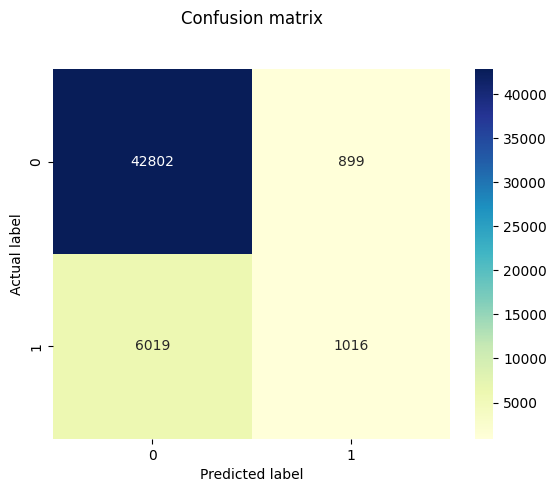

In [193]:
LRmodel = LogisticRegression(solver='saga', penalty='l1')
LRmodel.fit(X_train,y_train)
y_pred = LRmodel.predict(X_test)

In [12]:
from sklearn.metrics import confusion_matrix
cf_matrix = confusion_matrix(y_test, y_pred)
cf_matrix

array([[42803,   898],
       [ 6019,  1016]])

Text(0.5, 23.52222222222222, 'Predicted label')

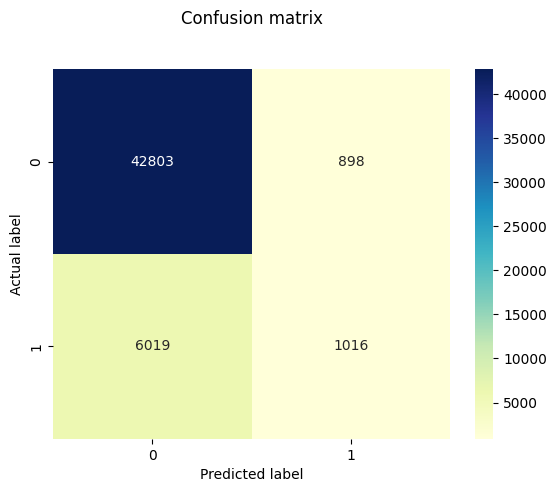

In [13]:
sns.heatmap(pd.DataFrame(cf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

<Axes: ylabel='Feature'>

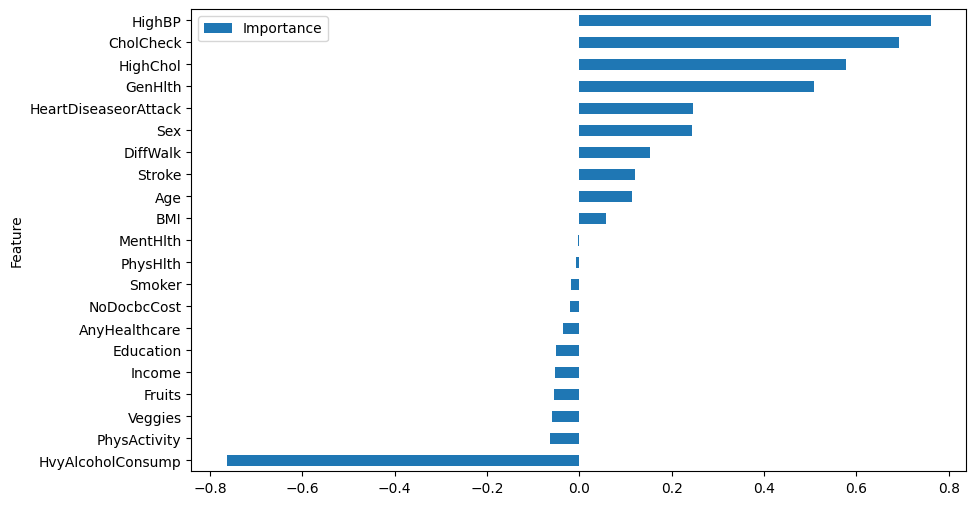

In [14]:
coefficients = LRmodel.coef_

avg_importance = np.mean((coefficients), axis=0)
feature_importance = pd.DataFrame({'Feature': X.columns, 'Importance': avg_importance})
feature_importance = feature_importance.sort_values('Importance', ascending=True)
feature_importance.plot(x='Feature', y='Importance', kind='barh', figsize=(10, 6))

Text(0.5, 1.0, 'Permutation Importance with Standard Deviation')

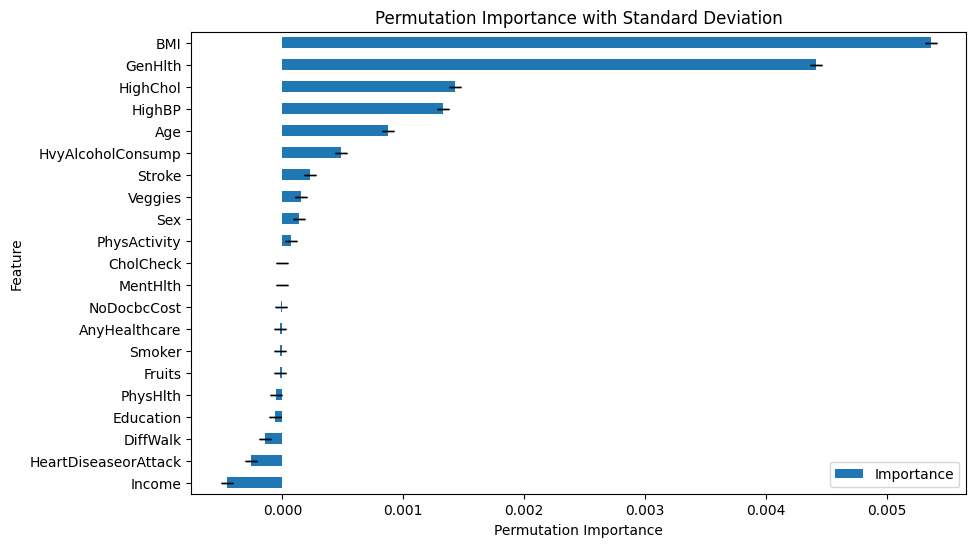

In [15]:
from sklearn.inspection import permutation_importance

result = permutation_importance(LRmodel, X_test, y_test, n_repeats=10, random_state=42)


feature_importance = pd.DataFrame({'Feature': X.columns,
                                   'Importance': result.importances_mean,
                                   'Standard Deviation': result.importances_std})
feature_importance = feature_importance.sort_values('Importance', ascending=True)


ax = feature_importance.plot(x='Feature', y='Importance', kind='barh', figsize=(10, 6), yerr='Standard Deviation', capsize=4)
ax.set_xlabel('Permutation Importance')
ax.set_title('Permutation Importance with Standard Deviation')

In [16]:
print(dict(y_train.value_counts()))
vc = dict(y_train.value_counts())

weights = {
    0: int(vc[(0,)])+.5*int(vc[(1,)]),
    1: int(vc[(1,)])*.5
}
dtc = DecisionTreeClassifier(min_impurity_decrease=0.0, class_weight=weights)
dtc.fit(X_train, y_train)


{(0,): 174633, (1,): 28311}


DecisionTreeClassifier(class_weight={0: 188788.5, 1: 14155.5})

In [17]:
y_pred = dtc.predict(X_test)
test_report = classification_report(y_test, y_pred, output_dict=True)
print(test_report)

{'0': {'precision': 0.8932050340103809, 'recall': 0.8623830118303929, 'f1-score': 0.8775234591473211, 'support': 43701.0}, '1': {'precision': 0.2960318389324593, 'recall': 0.35948827292110874, 'f1-score': 0.3246886634998074, 'support': 7035.0}, 'accuracy': 0.792652160201829, 'macro avg': {'precision': 0.5946184364714201, 'recall': 0.6109356423757508, 'f1-score': 0.6011060613235643, 'support': 50736.0}, 'weighted avg': {'precision': 0.8104016315471758, 'recall': 0.792652160201829, 'f1-score': 0.8008679721680507, 'support': 50736.0}}


Text(0.5, 23.52222222222222, 'Predicted label')

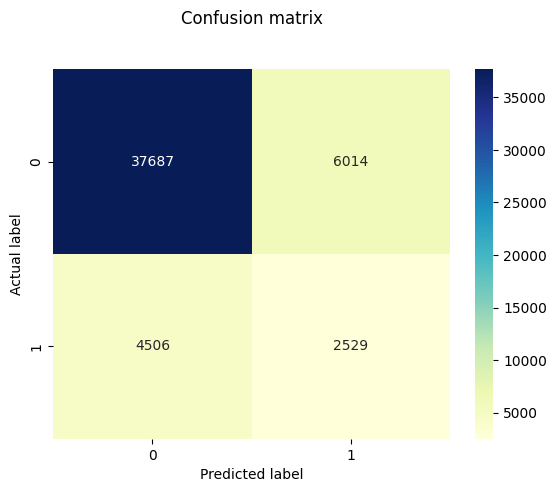

In [18]:
cf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(pd.DataFrame(cf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [19]:
import sklearn
tree_params = {'criterion':['gini', 'entropy'], 'max_depth':[4,5,6,7,8,9,10,11,12,15,20,30,40,50,70,90,120,150], 'class_weight':[weights]}
dtc = sklearn.model_selection.GridSearchCV(DecisionTreeClassifier(), tree_params, scoring='recall')
dtc.fit(X_train, y_train)

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'class_weight': [{0: 188788.5, 1: 14155.5}],
                         'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 5, 6, 7, 8, 9, 10, 11, 12, 15, 20, 30,
                                       40, 50, 70, 90, 120, 150]},
             scoring='recall')

In [20]:
dtc.best_params_

{'class_weight': {0: 188788.5, 1: 14155.5},
 'criterion': 'gini',
 'max_depth': 120}

In [21]:
weights = {
    0: int(vc[(0,)])+.5*int(vc[(1,)]),
    1: int(vc[(1,)])*.5
}
dtc = DecisionTreeClassifier(min_impurity_decrease=0.0, class_weight=weights, criterion=dtc.best_params_['criterion'], max_depth=dtc.best_params_['max_depth'])
dtc.fit(X_train, y_train)

y_pred = dtc.predict(X_test)
test_report = classification_report(y_test, y_pred, output_dict=True)
print('Test recall:', test_report['1']['recall'])

Test recall: 0.35394456289978676


              precision    recall  f1-score   support

           0       0.89      0.86      0.88     43701
           1       0.29      0.35      0.32      7035

    accuracy                           0.79     50736
   macro avg       0.59      0.61      0.60     50736
weighted avg       0.81      0.79      0.80     50736



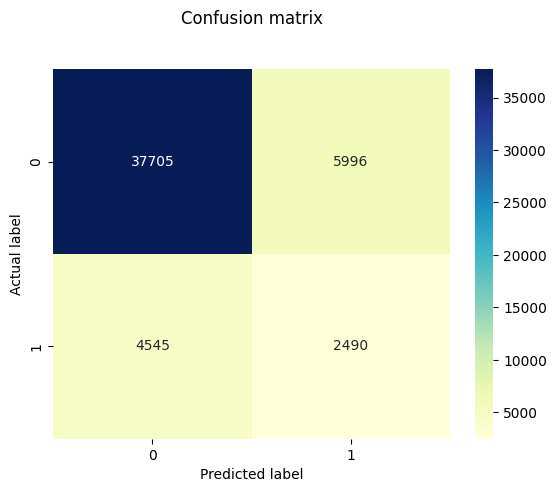

In [22]:
cf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(pd.DataFrame(cf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

print(classification_report(y_test, y_pred))

In [23]:
# predict on group of dev examples

start = 1300 + len(X_test)//2
end = start + 20

examples = X_test[start:end]
classes = y_test[start:end]
preds = dtc.predict(examples)
print(examples.columns)
classes = classes['Diabetes_binary'].to_numpy()

for i in range(len(preds)):
  print(f'Pred: {preds[i]}, True: {classes[i]==preds[i]},\nValues: {examples.iloc[i].to_numpy()}')

Index(['HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker', 'Stroke',
       'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education',
       'Income'],
      dtype='object')
Pred: 0, True: True,
Values: [ 0  0  1 30  0  0  0  1  0  1  1  1  0  2  0  0  0  0  3  6  8]
Pred: 0, True: False,
Values: [ 0  0  1 15  1  1  0  0  0  1  0  1  0  5 30 30  1  0 12  5  3]
Pred: 1, True: False,
Values: [ 0  0  1 24  0  0  0  0  1  1  0  1  0  3  0  0  0  0 10  3  5]
Pred: 0, True: True,
Values: [ 0  1  1 25  0  0  0  1  1  1  0  1  0  2  4  1  0  0  6  6  8]
Pred: 0, True: True,
Values: [ 1  0  1 27  1  0  1  1  0  1  0  1  0  3  0  0  0  1 10  5  5]
Pred: 0, True: True,
Values: [ 1  0  1 41  0  0  0  0  1  1  0  1  0  3  1  0  0  0  7  4  3]
Pred: 0, True: True,
Values: [ 0  0  1 22  0  0  0  0  1  1  0  1  0  1  0  0  0  0  9  6  8]
Pred: 0, True: True,
V

In [24]:
text_rep = sklearn.tree.export_text(dtc)
print(text_rep)

|--- feature_13 <= 3.50
|   |--- feature_0 <= 0.50
|   |   |--- feature_13 <= 2.50
|   |   |   |--- feature_18 <= 9.50
|   |   |   |   |--- feature_3 <= 29.50
|   |   |   |   |   |--- feature_1 <= 0.50
|   |   |   |   |   |   |--- feature_13 <= 1.50
|   |   |   |   |   |   |   |--- feature_3 <= 27.50
|   |   |   |   |   |   |   |   |--- feature_20 <= 4.50
|   |   |   |   |   |   |   |   |   |--- feature_15 <= 29.50
|   |   |   |   |   |   |   |   |   |   |--- feature_19 <= 3.50
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 5
|   |   |   |   |   |   |   |   |   |   |--- feature_19 >  3.50
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 14
|   |   |   |   |   |   |   |   |   |--- feature_15 >  29.50
|   |   |   |   |   |   |   |   |   |   |--- feature_20 <= 3.50
|   |   |   |   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |   |   |   |--- feature_20 >  3.50
|   |   |   |   |   |   |   |   |   |   |   |--- cl

# Deep Learning

In [9]:
import sklearn
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

params = {
    'hidden_layer_sizes': [(i, j) for i in [25, 50, 100] for j in [25, 50, 100]],
    'max_iter': [30],
}
mlpsearch = sklearn.model_selection.GridSearchCV(MLPClassifier(), params, scoring='recall')
mlpsearch.fit(X_train, y_train)
mlpsearch.best_params_



/home/will/USCCS/CS467-finalproject/projenv/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1101: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/will/USCCS/CS467-finalproject/projenv/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/will/USCCS/CS467-finalproject/projenv/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1101: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/will/USCCS/CS467-finalproject/projenv/lib/python3.11/site-packages/sklearn/neural_network/_multilay

NameError: name 'vc' is not defined

/home/will/USCCS/CS467-finalproject/projenv/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1101: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


              precision    recall  f1-score   support

           0       0.88      0.98      0.93     43701
           1       0.55      0.16      0.25      7035

    accuracy                           0.87     50736
   macro avg       0.72      0.57      0.59     50736
weighted avg       0.83      0.87      0.83     50736



/home/will/USCCS/CS467-finalproject/projenv/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


Text(0.5, 23.52222222222222, 'Predicted label')

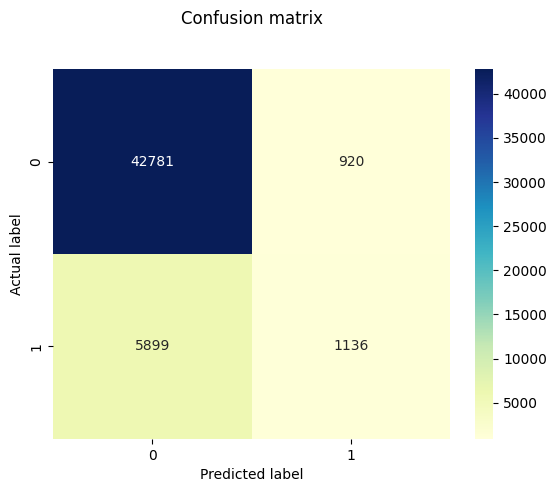

In [10]:
# ignore the above error, it took 35 mins to run and I just placed the rest down here isntead of running again to fix the error
vc = dict(y_train.value_counts())
weights = {
    0: 1,
    1: int(vc[(0,)])/int(vc[(1,)])
}
mlpmodel = MLPClassifier(hidden_layer_sizes=(
											mlpsearch.best_params_['hidden_layer_sizes'][0],
											mlpsearch.best_params_['hidden_layer_sizes'][1]), 
												max_iter=10)
mlpmodel.class_weight = weights
mlpmodel.fit(X_train, y_train)
y_pred = mlpmodel.predict(X_test)
print(classification_report(y_test, np.round(y_pred)))
cf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(pd.DataFrame(cf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [175]:
params = {
    'hidden_layer_sizes': [(i, j, k) for i in [25, 50, 100] for j in [25, 50, 100] for k in [25, 50, 100]],
    'max_iter': [30],
}
mlpsearch = sklearn.model_selection.GridSearchCV(MLPClassifier(), params, scoring='recall')
mlpsearch.fit(X_train, y_train)
mlpsearch.best_params_

/home/will/USCCS/CS467-finalproject/projenv/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1101: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/will/USCCS/CS467-finalproject/projenv/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/will/USCCS/CS467-finalproject/projenv/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1101: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/will/USCCS/CS467-finalproject/projenv/lib/python3.11/site-packages/sklearn/neural_network/_multilay

{'hidden_layer_sizes': (25, 100, 25), 'max_iter': 10}

In [ ]:
weights = {
    0: 1,
    1: int(vc[(0,)])/int(vc[(1,)])
}
mlpmodel = MLPClassifier(hidden_layer_sizes=(
											mlpsearch.best_params_['hidden_layer_sizes'][0],
											mlpsearch.best_params_['hidden_layer_sizes'][1],
											mlpsearch.best_params_['hidden_layer_sizes'][2]), 
												max_iter=30)
mlpmodel.class_weight = weights
mlpmodel.fit(X_train, y_train)

/home/will/USCCS/CS467-finalproject/projenv/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1101: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/will/USCCS/CS467-finalproject/projenv/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(hidden_layer_sizes=(25, 100, 25), max_iter=30)

              precision    recall  f1-score   support

           0       0.88      0.98      0.93     43701
           1       0.55      0.18      0.27      7035

    accuracy                           0.87     50736
   macro avg       0.72      0.58      0.60     50736
weighted avg       0.84      0.87      0.83     50736



Text(0.5, 23.52222222222222, 'Predicted label')

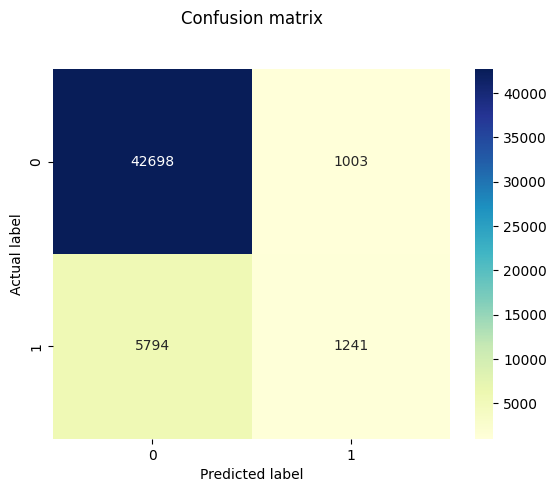

In [192]:
y_pred = mlpmodel.predict(X_test)
print(classification_report(y_test, np.round(y_pred)))
cf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(pd.DataFrame(cf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

# More Trees

In [100]:
import xgboost as xgb

dtrain = xgb.DMatrix(X_train, label=y_train)
ddev = xgb.DMatrix(X_val, label=y_val)
dtest = xgb.DMatrix(X_test, label=y_test)

xgb_params = {
    'eta': [0.001],
    'min_child_weight': [0.2, 1],
    'gamma': [0.1, 0,25, 0.5, 1],
    'subsample': [0.3, 0.6, 0.8],
    'colsample_bytree': [0.4, 0.7],
    'max_depth': [3, 5, 7],
    'lambda': [2]
}

xgbmodel = xgb.XGBClassifier()
xgbmodel = GridSearchCV(estimator=xgbmodel, param_grid=xgb_params, n_jobs=4)
xgbmodel.fit(X_train, y_train)
xgbmodel.best_params_

/home/will/USCCS/CS467-finalproject/projenv/lib/python3.11/site-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


{'colsample_bytree': 0.4,
 'eta': 0.001,
 'gamma': 0.1,
 'lambda': 2,
 'max_depth': 3,
 'min_child_weight': 0.2,
 'subsample': 0.3}

In [147]:
# value scales positive impact by this factor
xgb_params = {
	'scale_pos_weight': int(vc[(0,)])/int(vc[(1,)]),
}
xgbmodel = xgb.train(xgb_params, dtrain, 200, evals=[(ddev, 'dev')], early_stopping_rounds=10)

[0]	dev-rmse:0.46073
[1]	dev-rmse:0.44069
[2]	dev-rmse:0.43032
[3]	dev-rmse:0.42491
[4]	dev-rmse:0.42228


[5]	dev-rmse:0.42058
[6]	dev-rmse:0.41936
[7]	dev-rmse:0.41892
[8]	dev-rmse:0.41846
[9]	dev-rmse:0.41838
[10]	dev-rmse:0.41804
[11]	dev-rmse:0.41791
[12]	dev-rmse:0.41777
[13]	dev-rmse:0.41765
[14]	dev-rmse:0.41762
[15]	dev-rmse:0.41744
[16]	dev-rmse:0.41736
[17]	dev-rmse:0.41725
[18]	dev-rmse:0.41707
[19]	dev-rmse:0.41693
[20]	dev-rmse:0.41661
[21]	dev-rmse:0.41641
[22]	dev-rmse:0.41630
[23]	dev-rmse:0.41606
[24]	dev-rmse:0.41588
[25]	dev-rmse:0.41566
[26]	dev-rmse:0.41545
[27]	dev-rmse:0.41541
[28]	dev-rmse:0.41529
[29]	dev-rmse:0.41523
[30]	dev-rmse:0.41501
[31]	dev-rmse:0.41485
[32]	dev-rmse:0.41473
[33]	dev-rmse:0.41469
[34]	dev-rmse:0.41463
[35]	dev-rmse:0.41452
[36]	dev-rmse:0.41443
[37]	dev-rmse:0.41438
[38]	dev-rmse:0.41421
[39]	dev-rmse:0.41407
[40]	dev-rmse:0.41405
[41]	dev-rmse:0.41393
[42]	dev-rmse:0.41377
[43]	dev-rmse:0.41362
[44]	dev-rmse:0.41354
[45]	dev-rmse:0.41339
[46]	dev-rmse:0.41336
[47]	dev-rmse:0.41319
[48]	dev-rmse:0.41306
[49]	dev-rmse:0.41297
[50]	dev-rmse:0

              precision    recall  f1-score   support

           0       0.95      0.73      0.83     43701
           1       0.31      0.75      0.44      7035

    accuracy                           0.74     50736
   macro avg       0.63      0.74      0.64     50736
weighted avg       0.86      0.74      0.77     50736



Text(0.5, 23.52222222222222, 'Predicted label')

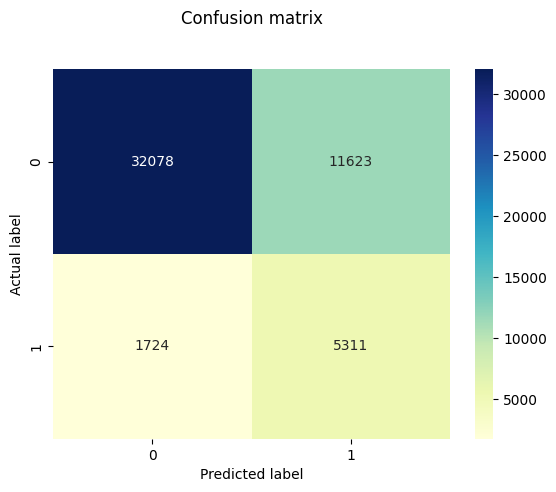

In [149]:
y_pred = xgbmodel.predict(dtest)
y_pred = np.round(y_pred)
y_pred[y_pred==-1] = 0
print(classification_report(y_test, np.round(y_pred)))
cf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(pd.DataFrame(cf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')